In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from tabulate import tabulate

from IPython.display import display, Math, Latex
from matplotlib.widgets import Slider, TextBox

import main as fin

In [119]:
def func_plot():
    f = plt.figure(figsize=(10,3))
    return (f.add_subplot(121), f.add_subplot(122))

def func_print(x, f, delta):
    m = np.array(list(zip(x[0::delta], f[0::delta])))
    headers = ["x", "f(x)"]

    # Generate the table in fancy format.
    table = tabulate(m, headers, tablefmt="fancy_grid")

    # Show it.
    print(table)
    
def fact_print(k, ak, bk, L, round_fact=4):
    sumstr = r'f(x)=\frac{a_0}{2}'

    for i in range(k):
        sumstr += f' + {round(ak[i],round_fact)}' + r'\times\cos(\frac{' + str(i+1) + r'\pi x}{' + str(round(L,round_fact)) + r'})' #'a_k cos(\frac{k \pi x}{L})'
    for i in range(k):
        sumstr += f' + {round(bk[i],round_fact)}' + r'\times\sin(\frac{' + str(i+1) + r'\pi x}{' + str(round(L,round_fact)) + r'})'

    display(Math(sumstr))

<h2>Generate some functions</h2>

For the following functions:
<ul>
    <li><i>dx </i>... is the distance between samples</li>
    <li><i>2*L </i>... is one period of the function</li>
</ul>

<h3>Triangular function (Hat function)</h3>

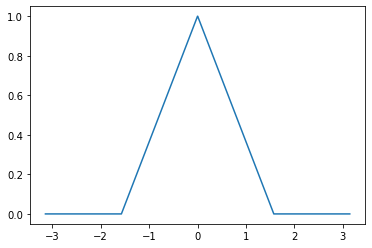

In [47]:
def hat_func(dx, L):
    x = L * np.arange(-1+dx, 1+dx, dx)
    n = len(x)
    nquart = int(np.floor(n/4))

    f = np.zeros_like(x)
    f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
    f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0, nquart)

    return (x, f)

x, f = hat_func(0.001, np.pi)
plt.plot(x, f)
plt.show()

In [51]:
#func_print(x, f, 199)

<!--<br style = "line-height:20;">

<h3>Rectangular function</h3>

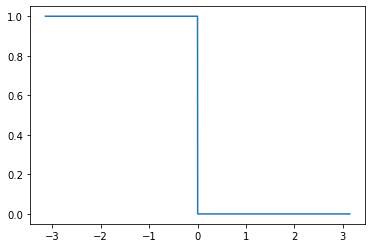

In [4]:
def rect_func(dx, L):
    x = L * np.arange(-1+dx, 1+dx, dx)
    f = np.zeros_like(x)
    f[0:int(x.size/2)] = 1
    return (x, f)
    
x, f = rect_func(0.001, np.pi)
plt.plot(x, f)
plt.show()

<h3>Some other function</h3>

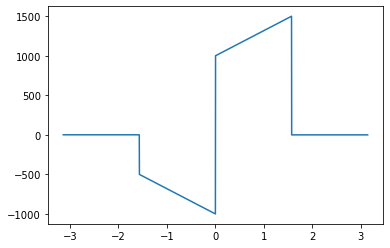

In [5]:
def mixed_func(dx, L):
    x = L * np.arange(-1+dx, 1+dx, dx)
    f = np.zeros_like(x)
    f[0:int(x.size/4)] = 1
    for i in range(int(x.size/4), int((x.size/4)*2)): f[i]=-i
    for i in range(int((x.size/4)*2), int((x.size/4)*3)): f[i]=i
    return (x, f)

x, f = mixed_func(0.001, np.pi)
plt.plot(x, f)
plt.show()

<h2>Fourier approximation</h2>

<h3>Compute Fourier-Factors from functions</h3>

$a_{0} = d_{x}\times \sum\limits_{n=0}^{N-1} f(x_{n})$

$a_{k} = d_{x}\times \sum\limits_{n=0}^{N-1} f(x_{n})\times cos(\frac{k \pi x_{n}}{L})$

$b_{k} = d_{x}\times \sum\limits_{n=0}^{N-1} f(x_{n})\times sin(\frac{k \pi x_{n}}{L})$

This is an implementation of DFT:

In [123]:
def dft(dx, L, n, x, f):
    A = np.zeros(n)
    B = np.zeros(n)
    
    A0 = np.sum(f) * dx
    for k in range(n):
        A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx
        B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    return (A0, A, B)

<h3>Compute Function of nth degree from Fourier-Factors</h3>
$f(x)=\frac{a_0}{2} + \sum\limits_{k=1}^{n} a_k cos(\frac{k \pi x}{L}) + b_k sin(\frac{k \pi x}{L})   $ 

In [124]:
def func_from_factors(x, L, A0, A, B, n):
    fFS = A0/2
    for k in range(n):
        fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    return fFS

<h3>Compute and visualize Fourier-Series of function</h3>

In [154]:
def demo(dx, L, n, function):
    x, f = function(dx, L)
    
    ax1, ax2 = func_plot()

    ax1.plot(x, f)
    A0, A, B = dft(dx, L, n, x, f)
    f2 = None
    for k in range(1, n):
        f2 = func_from_factors(x, L, A0, A, B, k)
        ax1.plot(x, f2)
        
    ax2.plot(x, f)
    ax2.plot(x, f2)
    plt.show()
    
    plt.show()
    return (A0, A, B, x, f)

<!--<br style = "line-height:25;">

<h2>Demonstration of fourier approximation</h2>

<h3>Fourier approximation for hat function</h3>

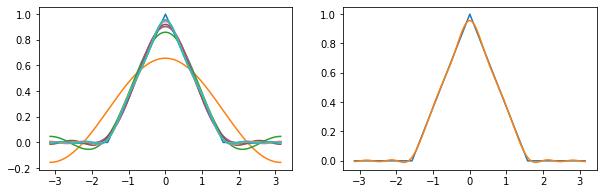

<IPython.core.display.Math object>

In [156]:
A0, A, B, x, f = demo(0.001, np.pi, 10, hat_func)
fact_print(k=3, ak=A, bk=B, L=np.pi)

<h3>Fourier approximation for rectengular function</h3>

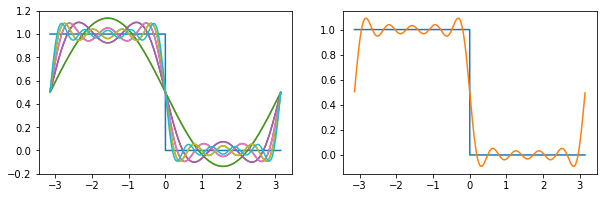

In [157]:
demo(0.001, np.pi, 10, rect_func);

<!--<br style = "line-height:15;">

<h3>Fourier approximation for some other function</h3>

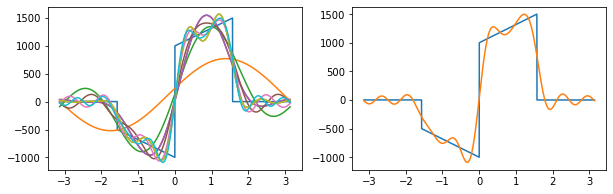

In [158]:
demo(0.001, np.pi, 10, mixed_func);

<h2>Demonstration of fourier approximation on a custom function</h2>

<h3>Custom function</h3>

In [139]:
%matplotlib qt
plotter = fin.FunctionDrawer()

In [144]:
%matplotlib inline

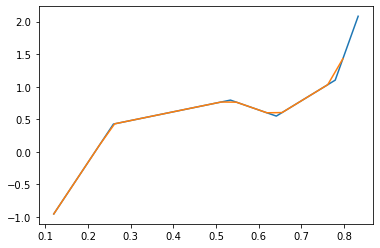

In [145]:
def custom_func(dx):
    raw_data = plotter._get_fct_values()
    interp_data = scipy.interpolate.interp1d(raw_data[0], raw_data[1])
    
    new_data = ([],[])
    max_val = max(raw_data[0])
    min_val = min(raw_data[0])
    L = (max_val - min_val)/2.0
    
    for x_val in np.arange(min_val, max_val, dx*L):
        new_data[0].append(x_val)
        new_data[1].append(interp_data(x_val))
    return (np.array(new_data[0]), np.array(new_data[1]), L)

x, f = plotter._get_fct_values()
plt.plot(x, f)
x, f, L = custom_func(0.1)
plt.plot(x, f)
plt.show()

<h3>Fourier approximation for a custom function</h3>

In [16]:

def demo_custom(dx, n):
    x, f, L = custom_func(dx)
    
    ax1, ax2 = func_plot()

    ax1.plot(x, f)
    A0, A, B = dft(dx, L, n, x, f)
    f2 = None
    for k in range(1, n):
        f2 = func_from_factors(x, L, A0, A, B, k)
        ax1.plot(x, f2)
    
    ax2.plot(x, f)
    ax2.plot(x, f2)
    plt.show()
    

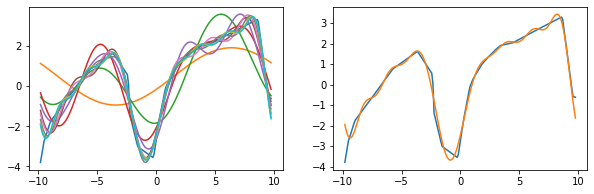

In [25]:
demo_custom(0.01, 10)